In [1]:
# Import useful libraries
import math
import time
# import config
import numpy as np
import pandas as pd
import os
import requests
import tweepy
import json
from PIL import Image
from io import BytesIO
from IPython.display import display

In [2]:
dog_archive = pd.read_csv('twitter-archive-enhanced.csv')
dog_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

file_name = url.split('/')[-1]

response = requests.get(url, stream=True)

# check file
if response.status_code == 200:
    response.raw.decode_content = True
#     open a local file
    with open(file_name, 'wb') as f:
        shutil.copyfileobj(response.raw, f)
        print('successfully downloaded', file_name)
else:
    print('File could not be retrieved')

successfully downloaded image-predictions.tsv


In [3]:
# Read image predictions into a dataframe
images = pd.read_csv('image-predictions.tsv', sep='\t')
images.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [4]:
# Extract the information we want from the json file
json_tweet_details = []

with open('tweet_json.txt', 'r', encoding='UTF-8') as file:
    for line in file:
        json_text = json.loads(line)
        # Extract the tweet_id, likes and retweet count
        tweet_id = json_text['id_str']
        retweets = json_text['retweet_count']
        likes = json_text['favorite_count']
        # Extract the hashtag from the json file
        hashtags_info = json_text['entities']['hashtags']
        if len(hashtags_info) !=0:
            hashtags = ['#'+item['text'] for item in hashtags_info]
        else:
            hashtags = 'None'
        # Assign these values into our list
        json_tweet_details.append({
            'tweet_id': tweet_id,
            'hashtag': hashtags,
            'retweets': retweets,
            'likes': likes}
        )

# Read all extracted data into a Pandas dataframe
json_tweet_info = pd.DataFrame(json_tweet_details)
json_tweet_info.head(10)

tweet_id      hashtag  retweets  likes
0  892420643555336193         None      8853  39467
1  892177421306343426         None      6514  33819
2  891815181378084864         None      4328  25461
3  891689557279858688         None      8964  42908
4  891327558926688256  [#BarkWeek]      9774  41048
5  891087950875897856  [#BarkWeek]      3261  20562
6  890971913173991426         None      2158  12041
7  890729181411237888         None     16716  56848
8  890609185150312448  [#BarkWeek]      4429  28226
9  890240255349198849         None      7711  32467

## Visual Assessment

### WeRateDogs Archive

In [5]:
dog_archive.sample(20)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1785  677644091929329666                    NaN                  NaN   
1743  679405845277462528                    NaN                  NaN   
639   793256262322548741                    NaN                  NaN   
209   852226086759018497                    NaN                  NaN   
512   811744202451197953                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
561   802624713319034886                    NaN                  NaN   
1601  686003207160610816                    NaN                  NaN   
692   787111942498508800                    NaN                  NaN   
198   854365224396361728                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
387   826598799820865537           8.265984e+17         4.196984e+09   
1222  714258258790387713                    NaN                  NaN   
1632  684460069371654144                    NaN                  NaN   
824   769940425801170949                    NaN                  NaN   
2149  669684865554620416           6.693544e+17         4.196984e+09   
440   819924195358416896                    NaN                  NaN   
34    885528943205470208                    NaN                  NaN   
1231  713177543487135744                    NaN                  NaN   
119   869772420881756160                    NaN                  NaN   

                      timestamp  \
1785  2015-12-18 00:18:36 +0000   
1743  2015-12-22 20:59:10 +0000   
639   2016-11-01 01:00:05 +0000   
209   2017-04-12 18:25:07 +0000   
512   2016-12-22 01:24:33 +0000   
2336  2015-11-16 15:14:19 +0000   
561   2016-11-26 21:26:58 +0000   
1601  2016-01-10 01:54:44 +0000   
692   2016-10-15 02:04:45 +0000   
198   2017-04-18 16:05:17 +0000   
1843  2015-12-13 01:41:41 +0000   
387   2017-02-01 01:11:25 +0000   
1222  2016-03-28 01:10:13 +0000   
1632  2016-01-05 19:42:51 +0000   
824   2016-08-28 16:51:16 +0000   
2149  2015-11-26 01:11:28 +0000   
440   2017-01-13 15:08:56 +0000   
34    2017-07-13 15:58:47 +0000   
1231  2016-03-25 01:35:51 +0000   
119   2017-05-31 04:27:59 +0000   

                                                 source  \
1785  <a href="http://twitter.com/download/iphone" r...   
1743  <a href="http://vine.co" rel="nofollow">Vine -...   
639   <a href="http://twitter.com/download/iphone" r...   
209   <a href="http://twitter.com" rel="nofollow">Tw...   
512   <a href="http://twitter.com/download/iphone" r...   
2336  <a href="http://twitter.com/download/iphone" r...   
561   <a href="http://twitter.com/download/iphone" r...   
1601  <a href="http://twitter.com/download/iphone" r...   
692   <a href="http://twitter.com/download/iphone" r...   
198   <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   
387   <a href="http://twitter.com/download/iphone" r...   
1222  <a href="http://twitter.com/download/iphone" r...   
1632  <a href="http://twitter.com/download/iphone" r...   
824   <a href="http://twitter.com/download/iphone" r...   
2149  <a href="http://twitter.com/download/iphone" r...   
440   <a href="http://twitter.com/download/iphone" r...   
34    <a href="http://twitter.com/download/iphone" r...   
1231  <a href="http://twitter.com/download/iphone" r...   
119   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1785  This is a dog swinging. I really enjoyed it so...                  NaN   
1743  Crazy unseen footage from Jurassic Park. 10/10...                  NaN   
639   Oh h*ck look at this spookling right here. Fri...                  NaN   
209   Meet General. He wasn't content with the quali...                  NaN   
512   This is Halo. She likes watermelon. 13/10 http...                  NaN   
2336     Can take selfies 11/10 https://t.co/ws

#### Quality issues

<span style='color:blue' >Low quality data is commonly referred to as dirty data. Dirty data has issues with its content. The Data Quality Dimensions are Completeness, Validity, Accuracy and Consistency. Here are examples of quality issues within our dataset:</span>

>- <span style='color:blue' >Unusual dog names such as a, an and not in the name column.</span>
>- <span style='color:blue' >We only want original ratings (no retweets) that have images</span>

#### Tidiness issues

>- <span style='color:blue' >The various stages of dog life: `doggo`, `pupper`, `puppo`, and `floofer` should be contained in one column.</span>
>- <span style='color:blue' >Unwanted columns are present in our data such as `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`.</span>
>- <span style='color:blue' >`rating_numerator` and `rating_denominator` can be combined into one column.</span>

In [6]:
images.sample(20)

tweet_id                                            jpg_url  \
724   686034024800862208    https://pbs.twimg.com/media/CYVIToGWQAAEZ_y.jpg   
1295  751937170840121344    https://pbs.twimg.com/media/Cm9q2d3XEAAqO2m.jpg   
1749  823699002998870016    https://pbs.twimg.com/media/C25d3nkXEAAFBUN.jpg   
1759  825829644528148480    https://pbs.twimg.com/media/C3XvqILXUAU2nnT.jpg   
1838  837471256429613056    https://pbs.twimg.com/media/C59LpELWUAEUmYh.jpg   
948   704819833553219584    https://pbs.twimg.com/media/CcgF5ovW8AACrEU.jpg   
1915  854365224396361728    https://pbs.twimg.com/media/C9tQokgUIAEETSx.jpg   
2007  877736472329191424    https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg   
1959  865718153858494464    https://pbs.twimg.com/media/DAOmEZiXYAAcv2S.jpg   
977   707038192327901184    https://pbs.twimg.com/media/Cc_ney1W4AANuY3.jpg   
498   675820929667219457    https://pbs.twimg.com/media/CWD_jQMWEAAdYwH.jpg   
1136  728760639972315136    https://pbs.twimg.com/media/Ch0T71OWMAA4yIw.jpg   
392   673580926094458881    https://pbs.twimg.com/media/CVkKRqOXIAEX83-.jpg   
243   670452855871037440    https://pbs.twimg.com/media/CU3tUC4WEAAoZby.jpg   
1508  785872687017132033  https://pbs.twimg.com/ext_tw_video_thumb/78587...   
890   699323444782047232    https://pbs.twimg.com/media/CbR-9edXIAEHJKi.jpg   
1384  765719909049503744    https://pbs.twimg.com/media/CqBiMAgWAAEJKgI.jpg   
1430  773191612633579521    https://pbs.twimg.com/media/CrrtqjdXEAINleR.jpg   
1667  812781120811126785    https://pbs.twimg.com/media/C0eUHfWUAAANEYr.jpg   
435   674394782723014656    https://pbs.twimg.com/media/CVvueeeWwAUcQLR.jpg   

      img_num                        p1   p1_conf  p1_dog                  p2  \
724         1                Great_Dane  0.236920    True     Irish_wolfhound   
1295        1          Lakeland_terrier  0.424168    True               teddy   
1749        1                     cairn  0.203999    True             snorkel   
1759        2            Great_Pyrenees  0.853407    True    golden_retriever   
1838        1        Norwegian_elkhound  0.976255    True            keeshond   
948         1                guinea_pig  0.994776   False             hamster   
1915        1                  Pembroke  0.907080    True            Cardigan   
2007        2  Chesapeake_Bay_retriever  0.837956    True  Labrador_retriever   
1959        1          golden_retriever  0.673664    True              kuvasz   
977         1                       pug  0.642426    True               llama   
498         1                    basset  0.556373    True              beagle   
1136        1                  Pembroke  0.939134    True            Cardigan   
392         1                    beagle  0.985062    True              basset   
243         1                Arctic_fox  0.188174   False               indri   
1508        1            Great_Pyrenees  0.392108    True    golden_retriever   
890         1        Labrador_retriever  0.309696    True             doormat   
1384        1          golden_retriever  0.969518    True  Labrador_retriever   
1430        1          Blenheim_spaniel  0.427766    True            Shih-Tzu   
1667        1              bull_mastiff  0.989316    True               boxer   
435         1             toilet_tissue  0.134983   False        mosquito_net   

       p2_conf  p2_dog                          p3   p3_conf  p3_dog  
724   0.117608    True  Greater_Swiss_Mountain_dog  0.103900    True  
1295  0.260562   False            golden_retriever  0.127432    True  
1749  0.171893   False             Norfolk_terrier  0.107543    True  
1759  0.053531    True              English_setter  0.045830    True  
1838  0.013990    True                   seat_belt  0.002111   False  
948   0.004069   False                 wood_rabbit  0.000206   False  
1915  0.086272    True                   Chihuahua  0.001413    True  
2007  0.062034    True                  Weimaraner  0.040599    True  
1959  0.157523 

### Image Predictions

#### Quality issues

>- <span style='color:blue' >The prediction in columns `p1`, `p2` and `p3` are not uniformly formatted. Some names are lowercase, some are uppercase and some are titlecase.</span>
>- <span style='color:blue' >The predictions above also have words seperated by underscores instead of spaces.</span>

In [7]:
json_tweet_info.sample(10)

tweet_id hashtag  retweets  likes
1928  674038233588723717    None       456   1176
1527  690248561355657216    None       477   1845
2297  667065535570550784    None        51    175
2309  666781792255496192    None       211    404
2328  666362758909284353    None       595    804
614   796563435802726400    None      8536      0
2187  668967877119254528    None        25    161
90    874434818259525634    None     15546      0
2098  670704688707301377    None       405    814
494   813172488309972993    None      2236  10384

<span style='color:blue' >No quality or tidiness issues have been found at the moment for the json tweet dataframe</span>

## Programmatic Assessment

In [8]:
dog_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### WeRateDogs Archive

>- <span style='color:blue' >`tweet_id` should be of object(string) data type and not integer since it will not be used in any calculations.</span>
>- <span style='color:blue' >The `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` should be intergers instead of float</span>
>- <span style='color:blue' >`retweeted_status_timestamp`, `timestamp` columns should be datetime instead of object (string)</span>
>- <span style='color:blue' >the `expanded_urls` column has null values.</span>
>- <span style='color:blue' >There are 181 retweets and 78 replies.</span>

In [9]:
# finding number of records with missing expanded urls
print(dog_archive[dog_archive['expanded_urls'].isnull()].isnull().sum())

tweet_id                       0
in_reply_to_status_id          4
in_reply_to_user_id            4
timestamp                      0
source                         0
text                           0
retweeted_status_id           58
retweeted_status_user_id      58
retweeted_status_timestamp    58
expanded_urls                 59
rating_numerator               0
rating_denominator             0
name                           0
doggo                          0
floofer                        0
pupper                         0
puppo                          0
dtype: int64


> <span style='color:blue' >They are either retweets or replies and will not be useful for our analysis</span>

In [10]:
# Checking for number of duplicate records
dog_duplicates = dog_archive.duplicated().sum()
print('There are {} duplicate records'.format(dog_duplicates))

There are 0 duplicate records


In [11]:
# Checking for unique values in the source column
for i, item in enumerate(dog_archive['source'].unique()):
    print(i, ': ', item)

0 :  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1 :  <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>
2 :  <a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
3 :  <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>


> <span style='color:blue' >The source of the tweet is the text between the anchor tags. So we will check if the link in the `text` and the `expanded_urls` column is the same. We will get a sample of each and compare them.</span>

In [12]:
# expand column width
pd.set_option("display.max_colwidth",150)

dog_archive[['text', 'expanded_urls']].sample(3)

text  \
1933   This is Acro. You briefly see her out of the corner of your eye. You look and she's not there. 10/10 mysterious pup https://t.co/fqiEsTduEs   
1298  When your roommate eats your leftover Chili's but you pretend it's no big deal cuz you fat anyway. 10/10 head up pup https://t.co/0nMgoue8IR   
1977            This is Schnozz. He's had a blurred tail since birth. Hasn't let that stop him. 10/10 inspirational pupper https://t.co/a3zYMcvbXG   

                                                        expanded_urls  
1933  https://twitter.com/dog_rates/status/674019345211760640/photo/1  
1298  https://twitter.com/dog_rates/status/707741517457260545/photo/1  
1977  https://twitter.com/dog_rates/status/672988786805112832/photo/1

In [13]:
import urlexpander
# url for id 2105
url = 'https://t.co/7JMAHdJ6A4'
expanded = 'https://twitter.com/dog_rates/status/670474236058800128/photo/1'
urlexpander.expand(url) == expanded

True

#### Conclusion
> <span style='color:blue' >a comparison of the two links revealed that both links are exactly the same and will therefore lead to the same tweet. So it is right to conclude that the `text` column contains both the text of the tweet and its url in shortened form and the same url is present in the `expanded_urls` column.</span>

### Filtering Dog Names
> <span style='color:blue' >During visual assessment, we identified some unusual dog names like a and an. These names were less than four characters long so we will examine the entire name column for names with less than four characters and analyze the result for more insight</span>

In [14]:
print('Dog names with 4 or less characters...\n')
print(dog_archive.name[dog_archive.name.apply(lambda x: len(x)<=4)].unique())

Dog names with 4 or less characters...

['None' 'Jax' 'Zoey' 'Koda' 'Ted' 'Jim' 'Zeke' 'such' 'Maya' 'Earl' 'Lola'
 'Yogi' 'Noah' 'Gus' 'Alfy' 'Koko' 'Rey' 'Gary' 'a' 'Jack' 'Emmy' 'Beau'
 'Aja' 'Cash' 'Coco' 'Jed' 'Kody' 'Dawn' 'Cody' 'Lili' 'Dave' 'Burt'
 'Carl' 'Thor' 'Luna' 'Arya' 'Iggy' 'Kyle' 'Leo' 'Odin' 'Tuck' 'Hank'
 'Ken' 'Max' 'Odie' 'Arlo' 'Lucy' 'Ava' 'Rory' 'Eli' 'Ash' 'Tobi' 'not'
 'Kuyu' 'Pete' 'Kyro' 'Loki' 'Mia' 'one' 'Mutt' 'Bear' 'Kona' 'Phil' 'Ike'
 'Mo' 'Toby' 'Nala' 'Gabe' 'Luca' 'Finn' 'Anna' 'Bo' 'Tom' 'Dido' 'Levi'
 'Alf' 'Sky' 'Tyr' 'Mary' 'Moe' 'Halo' 'Sam' 'Ito' 'Milo' 'Cali' 'Duke'
 'Chef' 'Doc' 'Sobe' 'Iroh' 'Ruby' 'Mack' 'Juno' 'Lily' 'Newt' 'Nida'
 'BeBe' 'mad' 'Dale' 'Hero' 'Godi' 'Dash' 'Bell' 'Jay' 'Mya' 'an' 'Huck'
 'very' 'O' 'Blue' 'Fizz' 'Chip' 'Grey' 'Al' 'just' 'Lou' 'Tito' 'Brat'
 'Tove' 'my' 'Kota' 'Eve' 'Rose' 'Theo' 'Fido' 'Emma' 'Gert' 'Dex' 'Ace'
 'Fred' 'Zoe' 'Blu' 'his' 'Cora' 'Abby' 'Geno' 'Beya' 'Kilo' 'Doug' 'Aqua'
 'Axel' 'Remy' 'th

<span style='color:blue'>A visual assessment of the results indicates that there are valid dog names with 4 or less characters. However, a closer look reveals that the invalid dog names are all in lowercase while the valid dog names have their firct character in uppercase. So we will use this to filter out the valid and invalid names.</span>

In [15]:
# Check the entire dataframe for dog names that are in lowercase
dog_names = dog_archive['name'].str.match(r"[A-Z].?")
invalid_names = dog_archive[~dog_names]['name'].value_counts()

print('{} records have invalid names\n'.format(invalid_names.sum()))

print(invalid_names)

109 records have invalid names

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64


### Assessing the ratings in the dataset

In [16]:
# Examine the unique values in rating numerator and denominator
print('Unique numerators \n')
print(dog_archive['rating_numerator'].unique())
print('\nUnique denominators \n')
print(dog_archive['rating_denominator'].unique())

Unique numerators 

[  13   12   14    5   17   11   10  420  666    6   15  182  960    0
   75    7   84    9   24    8    1   27    3    4  165 1776  204   50
   99   80   45   60   44  143  121   20   26    2  144   88]

Unique denominators 

[ 10   0  15  70   7  11 150 170  20  50  90  80  40 130 110  16 120   2]


In [17]:
# Distribution of ratings in the dataset
dog_archive[['rating_numerator', 'rating_denominator']].describe()

rating_numerator  rating_denominator
count       2356.000000         2356.000000
mean          13.126486           10.455433
std           45.876648            6.745237
min            0.000000            0.000000
25%           10.000000           10.000000
50%           11.000000           10.000000
75%           12.000000           10.000000
max         1776.000000          170.000000

> From the above results:
>- <span style='color:blue'> Most numerators are between 10 and 13 while most denominators are a 10. We will the use this information to check ratings that have a denominator that are not equal to 10 and numerator that is greater than maybe 15</span>
>- <span style='color:blue'> There are numerators as high as 1776 and denominators as high as 170</span>

In [18]:
# Check numerators > 15 and denominators !=10
check_rating = (dog_archive[(dog_archive['rating_numerator'] > 15) | (dog_archive['rating_denominator']!=10)])
# filter out the retweets
check_rating = (check_rating[check_rating['retweeted_status_id'].isnull()])
# filter out the replies
check_rating = (check_rating[check_rating['in_reply_to_status_id'].isnull()])

# Finally examine the text and the ratings
print('{} records found!'.format(check_rating.shape[0]))

check_rating[['text', 'rating_numerator', 'rating_denominator']]

22 records found!


text  \
433                                                     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t ...   
695                        This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://...   
902                                                                          Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
979                                                                          This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh   
1068           After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
1120                              Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1165                                                                                       Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
1202                                  This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1228                                                          Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1254                                           Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1274     From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1351                                                                     Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1433                                                           Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1635           Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55   
1662            This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5   
1712                                             Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   
1779                                                                                 IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq   
1843                                            Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw   
2074                                                                    After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY   
2335               This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv   

      rating_numerator  rating_denominator  
433                 84                  70  
516                 24                   7  
695                 75                  10  
763                 27                  10  
902                165                 150  
979               1776                  10  
1068                 9                  11  
1120               204                 170  
1165                 4                  20  
1202                50                  50 

> <span style='color:blue'>Some ratings that were pulled were actually referring to time such as the tweet with the text <span style='color:black'>*Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer.*</span> 
It should not be included as a rating</span>

#### Dog Stages

> <span style='color:blue'>For this section, we will count the number of dogs that belong to each of the stages that have been included in the dataset, namely: `doggo`, `floofer`, `pupper`, `puppo`</span>
> <span style='color:blue'>These columns have also been presented as separate columns which is unnecessary, so they will be merged later on into one column

In [19]:
for dog_stage in dog_archive.columns[-4:]:
    
    print('\nValue counts for {} column'.format(dog_stage))
    
    print(dog_archive[dog_stage].value_counts())


Value counts for doggo column
None     2259
doggo      97
Name: doggo, dtype: int64

Value counts for floofer column
None       2346
floofer      10
Name: floofer, dtype: int64

Value counts for pupper column
None      2099
pupper     257
Name: pupper, dtype: int64

Value counts for puppo column
None     2326
puppo      30
Name: puppo, dtype: int64


### Image Predictions

In [20]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


>- <span style='color:blue'>The data type of the `tweet_id` should be string instead of int</span>
>- <span style='color:blue'> The images dataframe has fewer records than the WeRateDogs archive</span>

In [21]:
# Check and remove duplicates
duplicates = images.duplicated().sum()
print('There are {} duplicate records'.format(duplicates))

There are 0 duplicate records


In [22]:
# remove tweet_id and img_num columns and compute the rest
cols = set(images.columns) - {'tweet_id', 'img_num'}
new_images = images[list(cols)]
new_images.describe()

p1_conf       p2_conf       p3_conf
count  2075.000000  2.075000e+03  2.075000e+03
mean      0.594548  1.345886e-01  6.032417e-02
std       0.271174  1.006657e-01  5.090593e-02
min       0.044333  1.011300e-08  1.740170e-10
25%       0.364412  5.388625e-02  1.622240e-02
50%       0.588230  1.181810e-01  4.944380e-02
75%       0.843855  1.955655e-01  9.180755e-02
max       1.000000  4.880140e-01  2.734190e-01

>- <span style='color:blue'> I removed the `tweet_id` column because it is not meant to be computed and the `img_num` column is irrelevant for our analysis</span>
>- <span style='color:blue'> The confidence levels are between 0 and 1 across the remaining columns</span>

#### Sample Predictions Columns

>- <span style='color:blue'>Next we will sample each of the prediction columns `p1`, `p2` and `p3` to check if they all correspond to dog breeds. We will then retrieve some images of the records that prove otherwise.</span>

In [23]:
for prediction in ('p1', 'p2', 'p3'):
    print('\nSample records from {} column\n'.format(prediction))
    
    print(images[prediction].value_counts().sample(10))


Sample records from p1 column

chimpanzee            2
shower_curtain        2
rotisserie            1
Rottweiler           17
crash_helmet          1
fountain              1
Walker_hound          5
giant_schnauzer       3
park_bench            1
Yorkshire_terrier     8
Name: p1, dtype: int64

Sample records from p2 column

Madagascar_cat        1
peacock               1
Angora                4
lampshade             1
Italian_greyhound    22
boxer                13
web_site              1
Afghan_hound          5
mosquito_net          1
Arabian_camel         4
Name: p2, dtype: int64

Sample records from p3 column

Bouvier_des_Flandres     2
ballplayer               1
cup                      1
desktop_computer         1
coyote                   2
Italian_greyhound       11
Brabancon_griffon        7
maze                     1
passenger_car            1
book_jacket              2
Name: p3, dtype: int64


>- <span style='color:blue'>From the above, not all records correspond to dog breeds. We will isolate and display them to confirm that they are indeed wrong predictions</span>

In [24]:
# Check for predictions that were not dog breeds
not_dogs = (~images.p1_dog) & (~images.p2_dog) & (~images.p3_dog)
not_dogs_prediction = images[not_dogs]

print('{} records with no actual dog breeds!\n'.format(not_dogs_prediction.shape[0]))

not_dogs_prediction.head()

324 records with no actual dog breeds!



tweet_id                                          jpg_url  \
6   666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
17  666104133288665088  https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18  666268910803644416  https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
21  666293911632134144  https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
25  666362758909284353  https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   

    img_num                p1   p1_conf  p1_dog          p2   p2_conf  p2_dog  \
6         1        box_turtle  0.933012   False  mud_turtle  0.045885   False   
17        1               hen  0.965932   False        cock  0.033919   False   
18        1  desktop_computer  0.086502   False        desk  0.085547   False   
21        1  three-toed_sloth  0.914671   False       otter  0.015250   False   
25        1        guinea_pig  0.996496   False       skunk  0.002402   False   

                p3   p3_conf  p3_dog  
6         terrapin  0.017885   False  
17       partridge  0.000052   False  
18        bookcase  0.079480   False  
21  great_grey_owl  0.013207   False  
25         hamster  0.000461   False

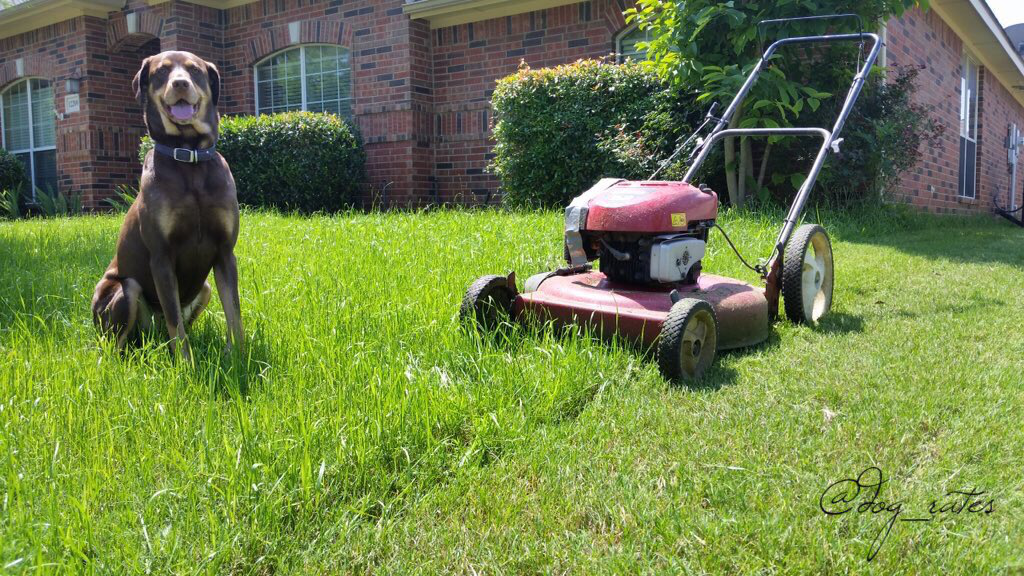

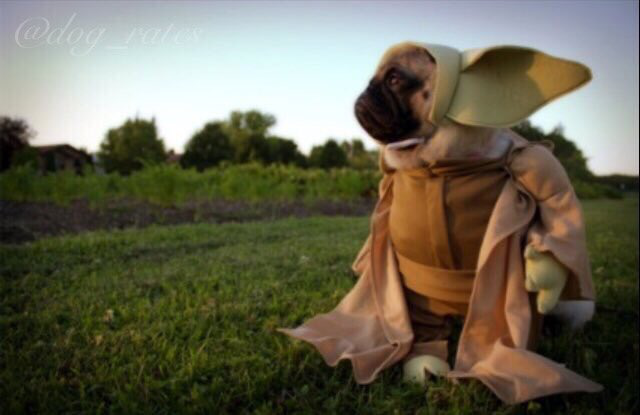

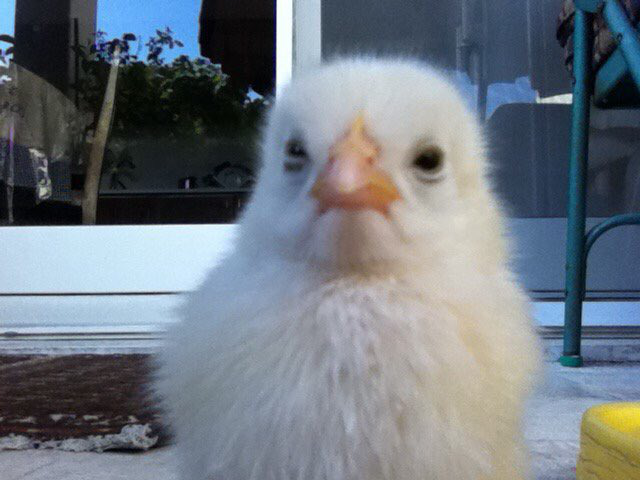

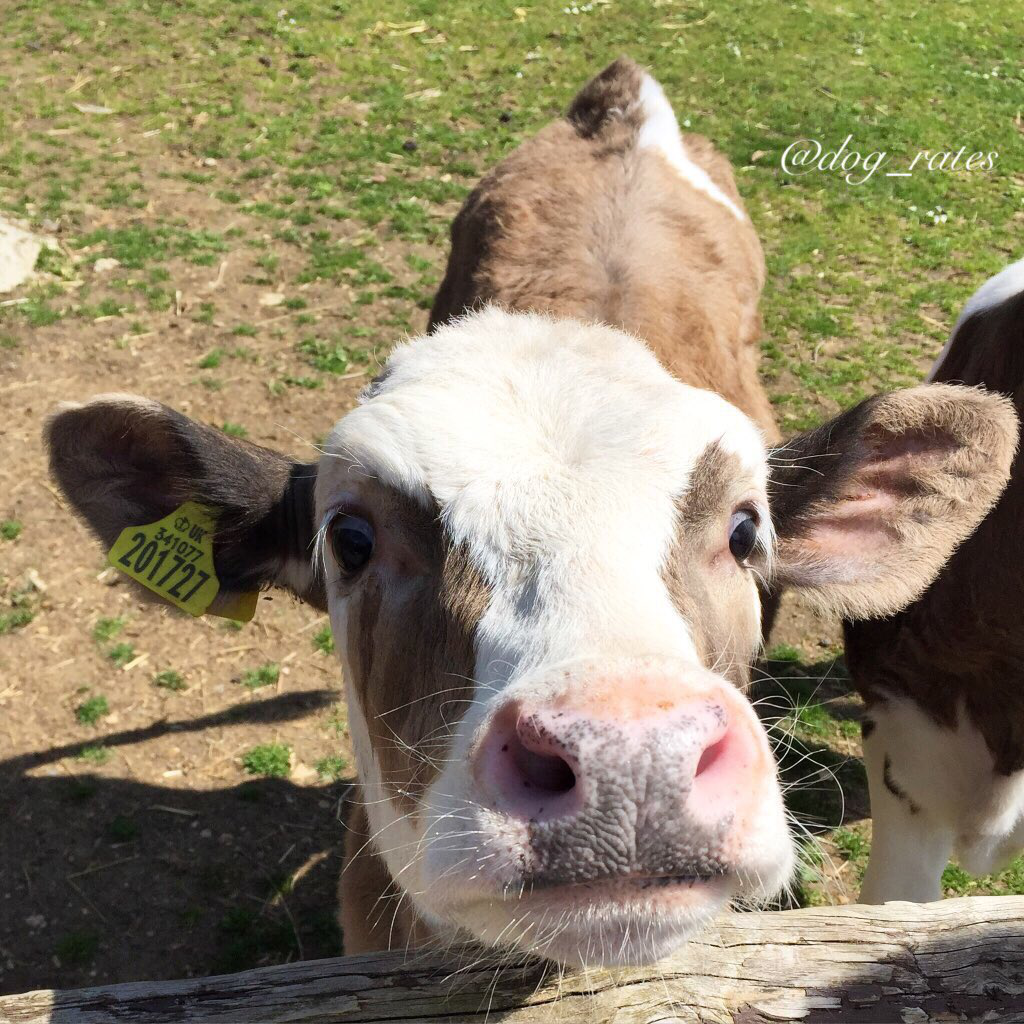

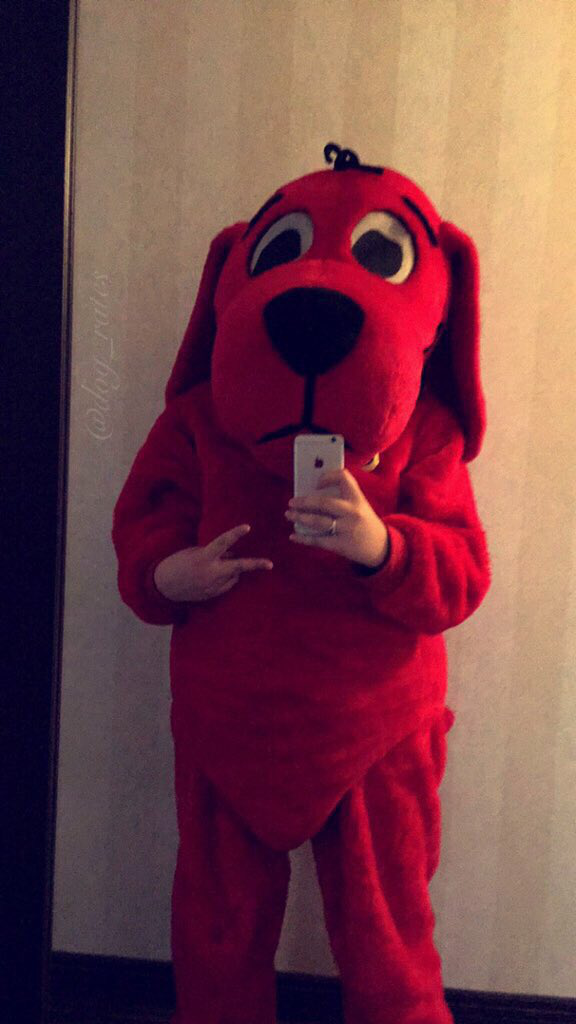

In [25]:
for url in not_dogs_prediction['jpg_url'].sample(5, random_state=10):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    display(img)

>- <span style='color:blue'> There are 324 instances where a dog breed was not detected.</span>
>- <span style='color:blue'> However, there have been false negatives in the output as seen above since some of the pictures have dogs but were recorded as having none.</span>

In [26]:
json_tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2354 non-null   object
 1   hashtag   2354 non-null   object
 2   retweets  2354 non-null   int64 
 3   likes     2354 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 73.7+ KB


> The data frame has no missing values

#### Common columns across all 3 datasets

In [27]:
np.intersect1d(np.intersect1d(dog_archive.columns, images.columns),
               json_tweet_info.columns)

array(['tweet_id'], dtype=object)

>- <span style='color:blue'>The `tweet_id` column is common across all three datasets</span>

### Cleaning Data

> It is advisable to make a copy of the original data before cleaning and make changes to the copy

In [109]:
dogs_copy = dog_archive.copy()
predictions_copy = images.copy()
json_copy = json_tweet_info.copy()

#### Define:

> From dogs_copy, drop records where `retweeted_status_id` and `in_reply_to_status_id` are not null.

#### Code:

In [110]:
#  Filter out retweets and replies using a boolean mask
retweet_reply_mask = (dogs_copy.retweeted_status_id.notnull() | 
                      dogs_copy.in_reply_to_status_id.notnull())

dogs_copy = dogs_copy[~retweet_reply_mask]

#### Test:

In [111]:
# Verify the absence of entries for the retweet and reply columns
assert dogs_copy.retweeted_status_id.isnull().all()
assert dogs_copy.in_reply_to_status_id.isnull().all()

print('dogs_copy now has {:,} records.'.format(dogs_copy.shape[0]))

dogs_copy now has 2,097 records.


#### Define:

> Convert the tweet_id column to object/string type and the timestamp column to a Pandas datetime object.

#### Code:

In [112]:
# Convert tweet_ids to string datatype
dogs_copy['tweet_id'] = dogs_copy['tweet_id'].astype(str)
# Convert timestamp to a pandas datetime object
dogs_copy['timestamp'] = pd.to_datetime(dogs_copy['timestamp'])

#### Test:

In [113]:
dogs_copy[['tweet_id', 'timestamp']].dtypes

tweet_id                  object
timestamp    datetime64[ns, UTC]
dtype: object

#### Define:

> Replace unusual names having improper capitalizations with None.

#### Code:

In [114]:
# Create a boolean mask to identify the unusual names
invalid_names_mask = dogs_copy['name'].str.match(r"[a-z].?")
# Identify each unique unusual name from the name column
invalid_names = dogs_copy['name'][invalid_names_mask].unique()
# Replace all unusual names with None
dogs_copy['name'] = dogs_copy['name'].apply(lambda n: 'None' if n in invalid_names else n)

#### Test:

In [115]:
# Verify if there are any improper names still present
assert dogs_copy['name'].str.match(r"[a-z].?").sum() == 0

#### Define:

> Drop the expanded_url column since the urls are already present in the tweet text.

#### Code:

In [116]:
dogs_copy.drop(columns='expanded_urls', inplace = True)

#### Test:

In [117]:
assert 'expanded_urls' not in dogs_copy.columns

#### Define:

> The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs. However, we will:

>- Remove the records with the overly high ratings of 420/10 and 1776/10.
>- Remove the record with rating of 24/7. This is a date, not an actual rating; the right rating is absent from the text.
>- Programmatically extract the right ratings from text to replace the wrong ones.
>- Convert high ratings allocated to dog groups to a scale of 10. This will be done later, when tidying up the dataframe.

#### Code:

In [118]:
# Filter out records with unwanted ratings: 420/10, 1776/10 and 24/7
for num, denum in zip([420, 1776, 24], [10, 10, 7]):
    mask = (dogs_copy['rating_numerator'] == num) & (dogs_copy['rating_denominator'] == denum)
    dogs_copy = dogs_copy[~mask]

In [119]:
# Isolate unusual ratings: numerator > 15 and denominator not equal to 10
over_rated_mask = (dogs_copy['rating_numerator'] > 15) | (dogs_copy['rating_denominator']!=10)
over_rated = dogs_copy[over_rated_mask].copy()

# Replace the numerator and denominators with the right values, if present in the tweet text
pattern = r"([0-9\.]+/[0-9]+)"
over_rated[['rating_numerator', 'rating_denominator']] = (over_rated['text']
                                                               .str.findall(pattern)
                                                               .str[-1]
                                                               .str.split('/', expand=True)
                                                              )

In [120]:
# Streamline the result down to the relevant columns
cleaned_ratings = over_rated[['text', 'rating_numerator', 'rating_denominator']]

# Update the ratings in archive clean with the cleaned ratings
dogs_copy.update(cleaned_ratings)

#### Test:

In [121]:
# Verify the removal of the unwanted ratings.
for rating_num in [420, 24, 1776]:
    assert rating_num not in dogs_copy.rating_numerator.unique()
    
# Verify the records with unusual ratings
dogs_copy[over_rated_mask][['text', 'rating_numerator', 'rating_denominator']]

text  \
433                                                     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
695                        This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://...   
902                                                                          Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
1068           After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
1120                              Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1165                                                                                       Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
1202                                  This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1228                                                          Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1254                                           Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1274     From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1351                                                                     Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1433                                                           Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1635           Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55   
1662            This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5   
1712                                             Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   
1779                                                                                 IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq   
1843                                            Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw   
2335               This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv   

     rating_numerator rating_denominator  
433                84                 70  
695              9.75                 10  
763             11.27                 10  
902               165                150  
1068               14                 10  
1120              204                170  
1165               13                 10  
1202               11                 10  
1228               99                 90  
1254               80                 80  
1274               45                 50  
1351               60                 50  
1433               44                 40  
1635              121                110  
1662               10                 10  
1712            11.26                 10  
1779              144                120  
1843               88                 80  
2335                9                 10

#### Define:

> Drop the unwanted columns from dogs_copy

#### Code:

In [122]:
unwanted_cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp']
dogs_copy.drop(columns=unwanted_cols, inplace=True)

#### Test

In [123]:
for col in unwanted_cols:
    assert col not in dogs_copy.columns

#### Define:

> The text column contains both tweet url and tweet text

> Extract the tweet url into a seperate column.

> Remove tweet urls from tweet text.

#### Code:

In [124]:
# Create a pattern to extract urls
pattern = r"(http.+)"

# Extract urls into a tweet url column
dogs_copy['tweet_url'] = dogs_copy['text'].str.extract(pattern)

# Account for records where tweet text does not contain a url
dogs_copy['tweet_url'].fillna('None', inplace = True)

# Remove urls from the text column
dogs_copy['text'] = dogs_copy['text'].str.replace(pattern, '', regex=True)

#### Test:

In [125]:
dogs_copy[['text', 'tweet_url']].sample(10)

text  \
906   Teagan reads entire books in store so they're free. Loved 50 Shades of Grey (how dare I make that joke so late) 9/10    
1369                                       This is Rudy. He's going to be a star. 13/10 talented af (vid by @madalynrossi)    
283                                                                         SHE MISPLACED HER HOOMAN 13/10 MISTAKES HAPPEN    
898         This is Lilli Bee &amp; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both 11/10    
507                         This is Brandi and Harley. They are practicing their caroling for later. Both 12/10 festive af    
693         This is Rory. He's got an interview in a few minutes. Looking spiffy af. Nervous as h*ck tho. 12/10 would hire    
1267            This is Olaf. He's gotta be rare. Seems sturdy. Tail is floofy af. 12/10 would do whatever it takes to pet    
244                      Meet Jarvis. The snow pupsets him. Officially ready for summer. 12/10 would perform a chilly boop    
1265                        WeRateDogs stickers are here and they're 12/10! Use code "puppers" at checkout 🐶🐾\n\nShop now:    
780    This is Anakin. He strives to reach his full doggo potential. Born with blurry tail tho. 11/10 would still pet well    

                                            tweet_url  
906                           https://t.co/l46jwv5WYv  
1369                          https://t.co/Dph4FDGoMd  
283                           https://t.co/ngAxYLVYHP  
898                           https://t.co/4UrfOZhztW  
507                           https://t.co/AbBDuGZUpp  
693                           https://t.co/ibj5g6xaAj  
1267                          https://t.co/E9jaU59bh9  
244                           https://t.co/0hLkztpiOW  
1265  https://t.co/k5xsufRKYm https://t.co/ShXk46V13r  
780                           https://t.co/9CcBSxCXXG

#### Define:

> Extract device information from source column and remove accompanying tags

#### Code:

In [126]:
# Create a pattern to extract info between the <a></a> tags
pattern = r">(.+)<"

# Extract information using the defined pattern
dogs_copy['source'] = dogs_copy['source'].str.extract(pattern)

#### Test:

In [127]:
dogs_copy.source.value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

#### Define:

>- Convert all ratings to a denominator scale of 0 using the expression: `rating=(ratingnumerator/ratingdenominator)×10`. With this expression, a rating of 120/100 becomes 12/10 and a rating of 55/60 becomes 9.16/10.
>- Once the ratings are standardized, reduce ratings to a single column called rating.
>- Drop the rating_numerator and rating_denominator columns.

#### Code:

In [128]:
# Use the expression to calculate a single rating value
rating = 10 * (dogs_copy['rating_numerator'].astype(float) / dogs_copy['rating_denominator'].astype(float))

# Allocate the values into a new column in archive_clean
dogs_copy['rating'] = rating

# Drop the rating numerator and denominator columns
dogs_copy.drop(columns=['rating_numerator', 'rating_denominator'], inplace=True)

#### Test:

In [129]:
# verify the removal of the dropped columns
for col in 'rating_numerator', 'rating_denominator':
    assert col not in dogs_copy.columns

# Check how standardized ratings are now distributed in the dataframe
dogs_copy.rating.describe().to_frame()

rating
count  2094.000000
mean     10.610926
std       2.147757
min       0.000000
25%      10.000000
50%      11.000000
75%      12.000000
max      14.000000

#### Define:

> The 4 dog stages have been put in separate columns

>- Check and correct any conflicting dog stages, if present and store all the dog stages in a single column called stage.
>- Drop the columns doggo, pupper, puppo, and floofer and set the stage column to a categorical type.

#### Code:

In [130]:
# Isolate the dog stage columns into a dataframe
dog_stages = dogs_copy[['doggo', 'pupper', 'puppo', 'floofer']]

# Check for multiple stages

stage = dog_stages.sum(axis=1)
stage.value_counts()

NoneNoneNoneNone        1758
NonepupperNoneNone       221
doggoNoneNoneNone         72
NoneNonepuppoNone         23
NoneNoneNonefloofer        9
doggopupperNoneNone        9
doggoNonepuppoNone         1
doggoNoneNonefloofer       1
dtype: int64

> There are several records present with multiple dog stages put together and most of them have the text None before and after making it difficult to read. We will trim the extra None characters

In [131]:
# Remove None from the each record unless the string is made up of only None
stage = stage.apply(lambda x: x.replace('None', '') if x.replace('None', '') != '' else 'None')

stage.value_counts()

None            1758
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
dtype: int64

> Doggo appears several times and is mixed with other dog breeds. We'll examine the specific records to make sure this was not recorded erroneously

In [132]:
# Assign the dog stages into a column in the dogs_copy dataframe
dogs_copy['stage'] = stage

# Identify and isolate records where dogs were assigned multiple stages
multiple_stages = ['doggopupper', 'doggopuppo', 'doggofloofer']
multiple_stage_mask = dogs_copy.stage.apply(lambda x: x in multiple_stages)

# Examine these occurences
dogs_copy[multiple_stage_mask][['tweet_id', 'tweet_url', 'text', 'stage']]

tweet_id                tweet_url  \
191   855851453814013952  https://t.co/cMhq16isel   
200   854010172552949760  https://t.co/TXdT3tmuYk   
460   817777686764523521  https://t.co/m7isZrOBX7   
531   808106460588765185  https://t.co/ANBpEYHaho   
575   801115127852503040  https://t.co/55Dqe0SJNj   
705   785639753186217984  https://t.co/f2wmLZTPHd   
733   781308096455073793  https://t.co/WQvcPEpH2u   
889   759793422261743616  https://t.co/MYwR4DQKll   
956   751583847268179968  https://t.co/u2c9c7qSg8   
1063  741067306818797568  https://t.co/o5J479bZUC   
1113  733109485275860992  https://t.co/pG2inLaOda   

                                                                                                                                               text  \
191         Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for    
200   At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs    
460   This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo)    
531                       Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time    
575                       This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine    
705   This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously    
733                                                                                                             Pupper butt 1, Doggo 0. Both 12/10    
889                       Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time    
956                               Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho    
1063                                                                           This is just downright precious af. 12/10 for both pupper and doggo    
1113                                                                                            Like father (doggo), like son (pupper). Both 12/10    

             stage  
191     doggopuppo  
200   doggofloofer  
460    doggopupper  
531    doggopupper  
575    doggopupper  
705    doggopupper  
733    doggopupper  
889    doggopupper  
956    doggopupper  
1063   doggopupper  
1113   doggopupper

> Upon examining the tweet ids, the text and checking the tweet urls, we obeserve the following:

>- Some stages have been pulled together because both of them were mentioned in the text but only one is the correct dog stage. Example `tweet_id` 855851453814013952.
>- Tweets with id: 808106460588765185, 781308096455073793, 759793422261743616, 741067306818797568, and 733109485275860992 are actually about two dogs, a doggo and a pupper, hence the doggopupper classification.
>- Tweet id 785639753186217984	is actually a hedgehog so we will remove the record.
>- A few of the stages were categorised wrongly. Below are the correct stages:
    > -  `855851453814013952` - puppo
    > -  `854010172552949760` - floofer.
    > -  `817777686764523521` - pupper.
    > -  `801115127852503040` - pupper.
    > -  `751583847268179968` - doggo


In [133]:
# Remove hedgehog: tweet_id 785639753186217984.
dogs_copy = dogs_copy.query("tweet_id != '785639753186217984'")

In [134]:
# Correct the wrongly categorized records
correct_record = {
    '855851453814013952': 'puppo',
    '854010172552949760': 'floofer',
    '817777686764523521': 'pupper',
    '801115127852503040': 'pupper',
    '751583847268179968': 'doggo'
}

for key in correct_record.keys():
    dogs_copy.loc[dogs_copy['tweet_id'] == key, 'stage'] = correct_record[key]

In [135]:
# Drop the columns puppo, doggo, floofer and pupper
dogs_copy.drop(columns=['doggo', 'pupper', 'puppo', 'floofer'], inplace=True)

# Convert the stage column to categorical type
dogs_copy.stage = dogs_copy.stage.astype('category')

#### Test:

In [136]:
# Check if hedgehog record has been dropped
assert '785639753186217984' not in dogs_copy.tweet_id.values

# Check if the unwanted columns have been dropped
assert dogs_copy.columns.any() not in ['doggo', 'pupper', 'puppo', 'floofer']

# Verify the datatype in the stage column
assert dogs_copy.stage.dtypes == 'category'

# Verify the values in the stage column
dogs_copy.stage.value_counts()

None           1758
pupper          223
doggo            73
puppo            24
floofer          10
doggopupper       5
Name: stage, dtype: int64

In [137]:
# Format dog stage to title case
dogs_copy.stage = dogs_copy.stage.apply(lambda x: x.title() if x !='doggopupper' else 'Doggo with Pupper')
dogs_copy.stage.value_counts()

None                 1758
Pupper                223
Doggo                  73
Puppo                  24
Floofer                10
Doggo with Pupper       5
Name: stage, dtype: int64

In [138]:
# Reset the indices of the dataframe
dogs_copy = dogs_copy.reset_index(drop=True)

# Preview results
dogs_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2093 non-null   object             
 1   timestamp  2093 non-null   datetime64[ns, UTC]
 2   source     2093 non-null   object             
 3   text       2093 non-null   object             
 4   name       2093 non-null   object             
 5   tweet_url  2093 non-null   object             
 6   rating     2093 non-null   float64            
 7   stage      2093 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 116.8+ KB


### Image Predictions

#### Define:

> - The different predictions (p1, p2, p3) and their respective confidence level (`p1_conf`, `p2_conf`, `p3_conf`) columns can be reduced into two columns to contain prediction and confidence variables. Iterate through each row of predictions_copy and extract the best prediction and confidence values. Assign these values into new columns named `breed` and `confidence`.
> - `p1_dog`, `p2_dog` and `p3_dog` columns can be used to select the appropriate predictions to be used.


#### Code:

In [139]:
# Create a list to store the best prediction and confidence values
prediction_list = []

# Define a function to perform the extraction process
def extract_breed_info(row):
    """
        Extracts the best prediction and confidence value from passed row.
        Params:
            row: a row from the dataframe of interest.
        Output:
            A dictionary containing prediction and confidence appended into prediction list.
            Prints a status update of extraction process.
    """
    if row.p1_dog:
        prediction_list.append({'breed': row.p1,'confidence': row.p1_conf})
    elif row.p2_dog:
        prediction_list.append({'breed': row.p2,'confidence': row.p2_conf})
    elif row.p3_dog:
        prediction_list.append({'breed': row.p3,'confidence': row.p3_conf})
    else:
        prediction_list.append({'breed': 'Unknown','confidence': 0})
        
    return 'Extracted to prediction list'

In [140]:
# Run the extraction process
predictions_copy.apply(extract_breed_info, axis=1)

0       Extracted to prediction list
1       Extracted to prediction list
2       Extracted to prediction list
3       Extracted to prediction list
4       Extracted to prediction list
                    ...             
2070    Extracted to prediction list
2071    Extracted to prediction list
2072    Extracted to prediction list
2073    Extracted to prediction list
2074    Extracted to prediction list
Length: 2075, dtype: object

In [141]:
# Assign the values in prediction list into new columns in predictions_copy
predictions_copy[['breed', 'confidence']] = pd.DataFrame(prediction_list)

# Round confidence to three decimal places
predictions_copy.confidence = round(predictions_copy.confidence, 3)

#### Test:

In [142]:
# Verify the extraction process
predictions_copy.iloc[:, 3:].sample(7)

p1   p1_conf  p1_dog                  p2   p2_conf  \
1343  Labrador_retriever  0.778546    True         bathing_cap  0.154254   
455       shower_curtain  0.238855   False              sarong  0.092414   
644           Rottweiler  0.760671    True  Labrador_retriever  0.096585   
687              cheetah  0.822193   False       Arabian_camel  0.046976   
1933    golden_retriever  0.895529    True        Irish_setter  0.024099   
1680            malamute  0.501159    True      Siberian_husky  0.228792   
1753      English_setter  0.526488    True    golden_retriever  0.402815   

      p2_dog                         p3   p3_conf  p3_dog               breed  \
1343   False           golden_retriever  0.024972    True  Labrador_retriever   
455    False                     kimono  0.056412   False             Unknown   
644     True  Staffordshire_bullterrier  0.040333    True          Rottweiler   
687    False                     jaguar  0.025785   False             Unknown   
1933    True         Labrador_retriever  0.019285    True    golden_retriever   
1680    True                 Eskimo_dog  0.200388    True            malamute   
1753    True               Irish_setter  0.034418    True      English_setter   

      confidence  
1343       0.779  
455        0.000  
644        0.761  
687        0.000  
1933       0.896  
1680       0.501  
1753       0.526

#### Define:

> - Remove the `img_num` column.
> - Drop all unwanted columns

#### Code:

In [143]:
# Drop all unwanted columns
unwanted_columns = ['p1','p2', 'p3','p1_conf', 'p2_conf', 'p3_conf','p1_dog', 'p2_dog', 'p3_dog', 'img_num']
predictions_copy.drop(columns=unwanted_columns, inplace=True)

#### Test:

In [144]:
assert predictions_copy.columns.any() not in unwanted_columns

#### Define:

> Convert tweet_id column to string/object type.

#### Code:

In [145]:
predictions_copy['tweet_id'] = predictions_copy['tweet_id'].astype(str)

#### Test:

In [146]:
assert predictions_copy['tweet_id'].dtypes == 'O'

#### Define:

> Format the prediction column entries to title case and replace underscores with spaces

#### Code:

In [147]:
# Replace underscores with space
predictions_copy.breed = predictions_copy.breed.str.replace('_', ' ').str.title()

#### Test:

In [148]:
predictions_copy.breed.unique()

array(['Welsh Springer Spaniel', 'Redbone', 'German Shepherd',
       'Rhodesian Ridgeback', 'Miniature Pinscher',
       'Bernese Mountain Dog', 'Unknown', 'Chow', 'Golden Retriever',
       'Miniature Poodle', 'Gordon Setter', 'Walker Hound', 'Pug',
       'Bloodhound', 'Lhasa', 'English Setter', 'Italian Greyhound',
       'Maltese Dog', 'Newfoundland', 'Malamute',
       'Soft-Coated Wheaten Terrier', 'Chihuahua',
       'Black-And-Tan Coonhound', 'Toy Terrier', 'Blenheim Spaniel',
       'Pembroke', 'Irish Terrier', 'Chesapeake Bay Retriever',
       'Curly-Coated Retriever', 'Dalmatian', 'Ibizan Hound',
       'Border Collie', 'Labrador Retriever', 'Miniature Schnauzer',
       'Airedale', 'Rottweiler', 'West Highland White Terrier',
       'Toy Poodle', 'Giant Schnauzer', 'Vizsla', 'Siberian Husky',
       'Papillon', 'Saint Bernard', 'Tibetan Terrier', 'Borzoi', 'Beagle',
       'Yorkshire Terrier', 'Pomeranian', 'Kuvasz',
       'Flat-Coated Retriever', 'Norwegian Elkhound', '

### JSON Data

#### Define:

> Hashtags have been stored as lists instead of strings. We will change this using the explode method and get unique values

#### Code:

In [149]:
json_copy = json_copy.explode('hashtag')

#### Test:

In [150]:
json_copy.hashtag.value_counts()

None                      2327
#BarkWeek                    9
#PrideMonth                  4
#BellLetsTalk                1
#NoDaysOff                   1
#notallpuppers               1
#LoveTwitter                 1
#FinalFur                    1
#ImWithThor                  1
#WomensMarch                 1
#GoodDogs                    1
#WKCDogShow                  1
#K9VeteransDay               1
#ScienceMarch                1
#dogsatpollingstations       1
#PrideMonthPuppo             1
#Canada150                   1
#BATP                        1
#swole                       1
Name: hashtag, dtype: int64

#### Create a Master Dataset

> We will merge all the three datasets using the tweet_id column as it is common in all three datasets as seen earlier. We will check to make sure the data type of `tweet_id` is the same in all 3 data sets to avoid merge conflicts and change where necessary.

In [151]:
# reset dataframe indices for json dataframe and predictions dataframe
json_copy = json_copy.reset_index(drop=True)
predictions_copy = predictions_copy.reset_index(drop=True)

In [152]:
# Merge dogs_copy and predictions_copy into master df
master_df = pd.merge(dogs_copy, predictions_copy, on='tweet_id', how='inner')

# Merge json_copy into master df
master_df = pd.merge(master_df, json_copy, on='tweet_id', how='inner')

master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   tweet_id    1969 non-null   object             
 1   timestamp   1969 non-null   datetime64[ns, UTC]
 2   source      1969 non-null   object             
 3   text        1969 non-null   object             
 4   name        1969 non-null   object             
 5   tweet_url   1969 non-null   object             
 6   rating      1969 non-null   float64            
 7   stage       1969 non-null   category           
 8   jpg_url     1969 non-null   object             
 9   breed       1969 non-null   object             
 10  confidence  1969 non-null   float64            
 11  hashtag     1969 non-null   object             
 12  retweets    1969 non-null   int64              
 13  likes       1969 non-null   int64              
dtypes: category(1), datetime64[ns, UTC](1), 

In [153]:
# Reorder the columns
column_order = ['tweet_id', 'timestamp', 'name', 'breed', 'confidence', 'stage', 'rating',
                'hashtag', 'retweets', 'likes', 'jpg_url', 'tweet_url', 'text']
master_df = master_df[column_order]

# Give columns descriptive names
master_df.rename(
    columns={
        'name': 'dog_name',
        'breed': 'dog_breed',
        'stage': 'dog_stage',
        'jpg_url': 'image'
    }, inplace=True)

In [154]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   tweet_id    1969 non-null   object             
 1   timestamp   1969 non-null   datetime64[ns, UTC]
 2   dog_name    1969 non-null   object             
 3   dog_breed   1969 non-null   object             
 4   confidence  1969 non-null   float64            
 5   dog_stage   1969 non-null   category           
 6   rating      1969 non-null   float64            
 7   hashtag     1969 non-null   object             
 8   retweets    1969 non-null   int64              
 9   likes       1969 non-null   int64              
 10  image       1969 non-null   object             
 11  tweet_url   1969 non-null   object             
 12  text        1969 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(2), object(7)
memory usage: 202.1+ 

### Store Data

In [155]:
# Store master_df locally
master_df.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')

### Analysis and Visualization

#### 1. Most popular dog breeds?

In [163]:
# visualisation libraries
import seaborn as sns
sns.set(color_codes=True)
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [164]:
# Remove records with unknown breeds
dog_breeds = master_df.query("dog_breed != 'Unknown'")

# most popular breeds and their tweet counts
popular_dogs = dog_breeds.dog_breed.value_counts().head(10)

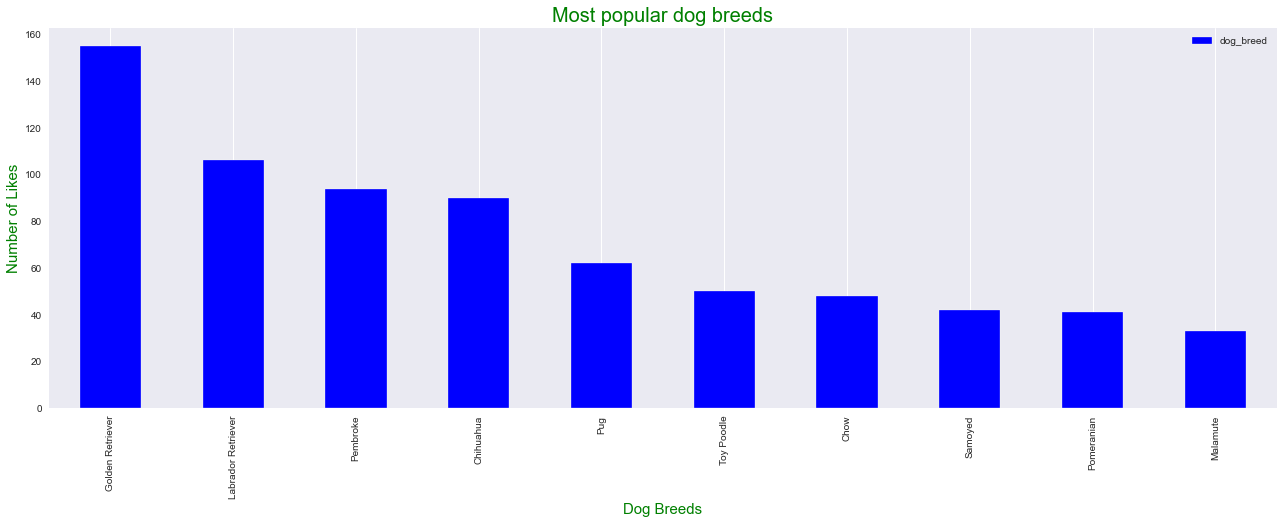

In [165]:
popular_dogs.plot(kind = 'bar', figsize = (22,7), color= 'blue')
plt.xlabel('Dog Breeds', fontsize = 15, color = 'green')
plt.ylabel('Number of Likes', fontsize = 15, color = 'green')
plt.legend()
plt.title('Most popular dog breeds',fontsize = 20, color = 'green')
plt.grid(axis = 'y');

> Top 5 most popular dog breeds
> - Golden retriever
> - Labrador retriever
> - Pembroke
> - Chihuahua
> - Pug

#### Correlation between attributes in the dataset?

confidence    rating  retweets     likes
confidence    1.000000  0.267812  0.036010  0.085801
rating        0.267812  1.000000  0.308069  0.411014
retweets      0.036010  0.308069  1.000000  0.913021
likes         0.085801  0.411014  0.913021  1.000000

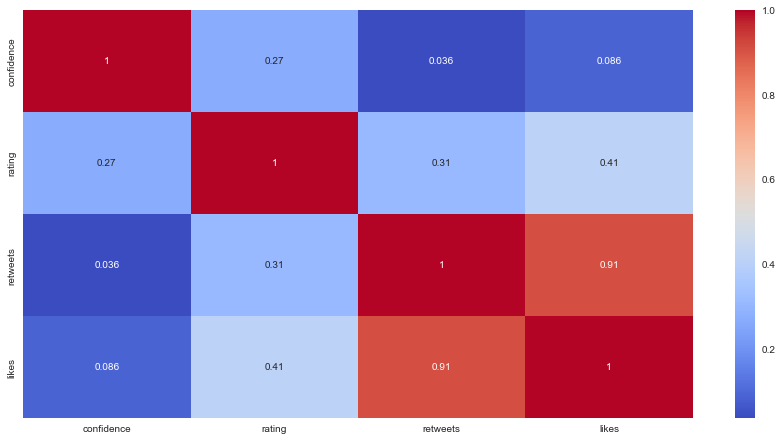

In [166]:
plt.figure(figsize=(15, 7.5))
c_relation = master_df.corr()
sns.heatmap(c_relation, cmap='coolwarm', annot=True)
c_relation

> - There is a strong positive correlation between like and retweets meaning the more likes a picture gets, the higher the chances it will be retweeted and the more popular it becomes

#### How do hashtags affect tweet engagement?

In [168]:
# Select only relevant columns from the master dataframe
hashtag_tweets = master_df[['hashtag', 'likes', 'retweets', 'rating']].copy()

# Create a new column to show if hashtags are present in each record
hashtag_tweets['has_hashtag'] = hashtag_tweets.hashtag.apply(lambda x: x!='None')

# Print information about how much hashtags are present in the dataframe
print('Number of tweets with hashtags')
print(hashtag_tweets.has_hashtag.value_counts(), '\n')

print('Percentage of tweets with hashtags')
(hashtag_tweets.has_hashtag.value_counts(normalize=True).round(3)*100).astype(str)+'%'

Number of tweets with hashtags
False    1945
True       24
Name: has_hashtag, dtype: int64 

Percentage of tweets with hashtags


False    98.8%
True      1.2%
Name: has_hashtag, dtype: object

In [169]:
# Aggregate ratings, retweets and likes by hashtag use
hashtag_tweets.groupby('has_hashtag')[['retweets', 'likes', 'rating']].mean().astype(int)

retweets  likes  rating
has_hashtag                         
False            2732   8774      10
True             6946  23521      12

> - There are very few tweets that actually use hashtags. That is about 1.2% which is a very small number to use to be able to make meaningful conclusions.
> - However, it seems that tweets with hashtags have a relatively higher number of likes and retweets than those that do not.

### Conclusions

> - The top 5 breeds are the Golden Retriever, Labrador retriever, Pembroke, Chihuahua, and Pug
> - Only about 1.2% of the total tweets had hashtags included which suggests that they are not very popular among users.
> - Retweets and likes are strongly correlated, with a positive correlation coefficient of 0.91.

### Limitations

> - Some of the actual dog images were wrongly classified by the image predictions neural network.
> - Tweets with hashtags only comprised 1.2% of the entire dataset but it was observed that tweets with hashtags generated more interactions and ratings on average than those without.
> - Based on the strong positive correlation between likes and retweets, an assumption was made that certain dogs were made popular as a result of this observation.

#### References

* <a href="https://nbviewer.org/github/Lippins/WeRaTeDogs-Analysis/blob/main/wrangle_act.ipynb">Love this work</a>